In [201]:
from IPython.display import display

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **PRIMERA PARTE**

## 1) Funcion para leer y redimenzionar segun la plataforma

In [202]:
from PIL import Image
import requests
from io import BytesIO

def redimensionar(path, plataforma):
    tamaños = {
        "instagram": (1080, 1080),
        "youtube": (1280, 720),
        "twitter": (1600, 900),
        "facebook": (1200, 630)
    }

    plataforma = plataforma.lower()
    if plataforma not in tamaños:
        raise ValueError("Plataforma no válida.")

    w_d, h_d = tamaños[plataforma]

    # Leer desde URL o archivo local
    if path.startswith("http"):
        respuesta = requests.get(path)
        img = Image.open(BytesIO(respuesta.content))
    else:
        img = Image.open(path)

    # Mantener proporción
    img.thumbnail((w_d, h_d))

    # Crear fondo centrado
    fondo = Image.new("RGB", (w_d, h_d), (0, 0, 0))
    x = (w_d - img.width) // 2
    y = (h_d - img.height) // 2
    fondo.paste(img, (x, y))

    return fondo


## Ecualizacion del histograma (ajustar contraste)

In [203]:
import numpy as np
from PIL import Image

def ecualizar_contraste(path):
    img = Image.open(path).convert("L")
    arr = np.array(img)

    hist, bins = np.histogram(arr.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_norm = 255 * cdf / cdf[-1]

    arr_eq = np.interp(arr.flatten(), bins[:-1], cdf_norm)
    arr_eq = arr_eq.reshape(arr.shape).astype("uint8")

    eq_img = Image.fromarray(arr_eq)

    return img, eq_img


## Filtros


In [204]:
def dodge(front, back):
    # front y back son imágenes en escala de grises
    front = np.array(front).astype('float')
    back = np.array(back).astype('float')
    result = front * 255 / (255 - back + 1e-6)
    result[result > 255] = 255
    return Image.fromarray(result.astype('uint8'))



## Funcion ayudar artistas

In [205]:
from PIL import Image, ImageOps, ImageFilter

def generar_boceto(path, persona=True):
    if not persona:
        raise Exception("La IA no detectó una persona en la imagen.")

    img = Image.open(path).convert("L")
    blur = img.filter(ImageFilter.GaussianBlur(5))
    boceto = dodge(img, blur)


    return boceto


## Menu interactivo con excepciones

In [206]:
from IPython.display import display, clear_output

def menu():
    ultima_img = None  # <-- guardamos la última imagen procesada

    while True:
        print("""
1) Cargar + Redimensionar imagen
2) Ecualizar contraste
3) Aplicar filtro
4) Generar boceto
5) Mostrar última imagen
0) Salir
""")
        op = input("Opción: ")

        try:
            if op == "1":
                path = input("Ruta o URL: ")
                plataforma = input("Plataforma (instagram/youtube/twitter/facebook): ")
                ultima_img = redimensionar(path, plataforma)
                ultima_img.save("redimensionada.jpg")
                print("Imagen cargada y redimensionada.\n")

            elif op == "2":
                if ultima_img is None:
                    print("Primero debe cargar una imagen.\n")
                    continue
                ultima_img = ecualizar_contraste(ultima_img)
                ultima_img.save("ecualizada.jpg")
                print("Contraste ecualizado.\n")

            elif op == "3":
                if ultima_img is None:
                    print("Primero debe cargar una imagen.\n")
                    continue
                f = input("Filtro: ").lower()
                if f not in filtros_pillow:
                    print("Filtro no válido.\n")
                    continue
                ultima_img = ultima_img.filter(filtros_pillow[f])
                ultima_img.save(f"filtro_{f}.jpg")
                print("Filtro aplicado.\n")

            elif op == "4":
                if ultima_img is None:
                    print("Primero debe cargar una imagen.\n")
                    continue
                ultima_img = generar_boceto_obj(ultima_img)
                ultima_img.save("boceto.jpg")
                print("Boceto generado.\n")

            elif op == "5":
                if ultima_img is None:
                    print("No hay imagen para mostrar.\n")
                else:
                    print("Mostrando última imagen procesada...\n")
                    display(ultima_img)

            elif op == "0":
                print("Saliendo del programa.")
                break

            else:
                print("Opción inválida.\n")

        except Exception as e:
            print("Error:", e, "\n")



1) Cargar + Redimensionar imagen
2) Ecualizar contraste
3) Aplicar filtro
4) Generar boceto
5) Mostrar última imagen
0) Salir

Imagen cargada y redimensionada.


1) Cargar + Redimensionar imagen
2) Ecualizar contraste
3) Aplicar filtro
4) Generar boceto
5) Mostrar última imagen
0) Salir

Mostrando última imagen procesada...



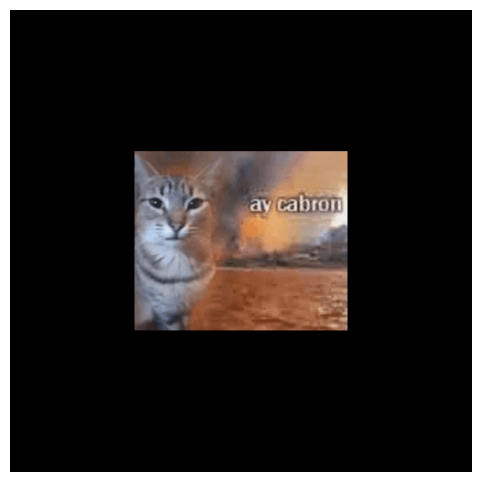


1) Cargar + Redimensionar imagen
2) Ecualizar contraste
3) Aplicar filtro
4) Generar boceto
5) Mostrar última imagen
0) Salir



In [ ]:


menu()


